In [2]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


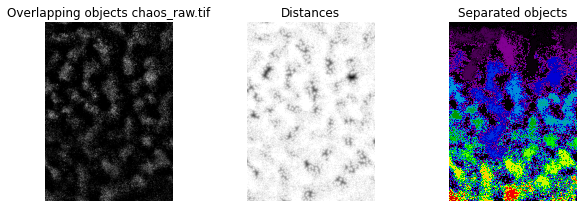

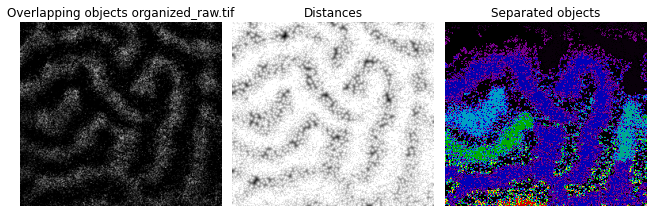

In [3]:

os.chdir("/Users/domchom/Desktop/opticalFlow-testing/watershed/single_frame") # the pathname that contains the folders of interest

fileNames = [] #list for each of the file names
for file in glob.glob("*.tif"): #obtaining the name of each file that ends in ".tif" in the provided directory
    fileNames.append(file)
    fileNames.sort()

for file in fileNames:
    img = plt.imread(file)

    distance = ndi.distance_transform_edt(img)
    coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=img)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-distance, markers, mask=img)

    fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title(f'Overlapping objects {file}')
    ax[1].imshow(-distance, cmap=plt.cm.gray)
    ax[1].set_title('Distances')
    ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
    ax[2].set_title('Separated objects')

    for a in ax:
        a.set_axis_off()

    fig.tight_layout()

plt.show()

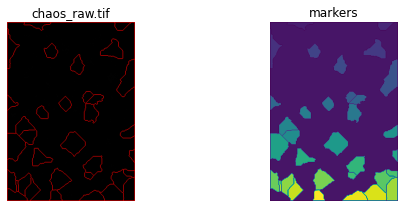

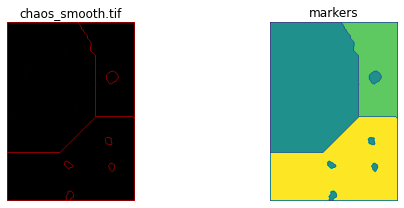

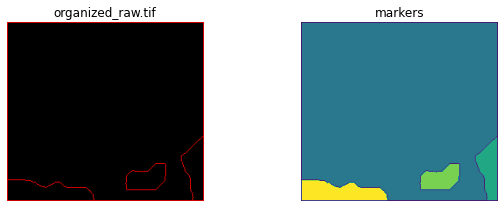

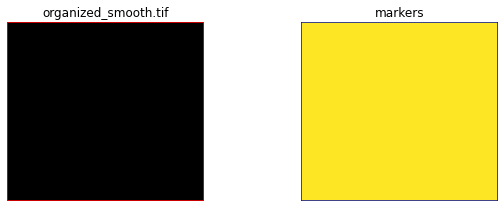

In [33]:

os.chdir("/Users/domchom/Desktop/opticalFlow-testing/watershed/single_frame") # the pathname that contains the folders of interest

fileNames = [] #list for each of the file names
for file in glob.glob("*.tif"): #obtaining the name of each file that ends in ".tif" in the provided directory
    fileNames.append(file)
    fileNames.sort()

for file in fileNames:
    img = cv2.imread(file)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]

    fig, axes = plt.subplots(ncols=2, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img)
    ax[0].set_title(f'{file}')
    ax[1].imshow(markers)
    ax[1].set_title('markers')

    for a in ax:
        a.set_axis_off()

    fig.tight_layout()

plt.show()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


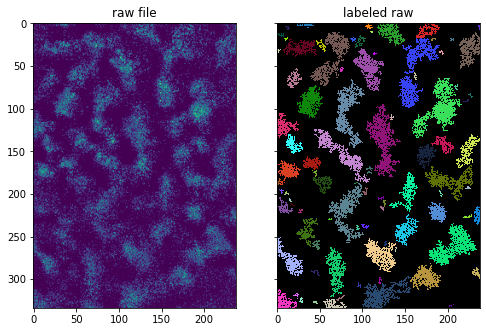

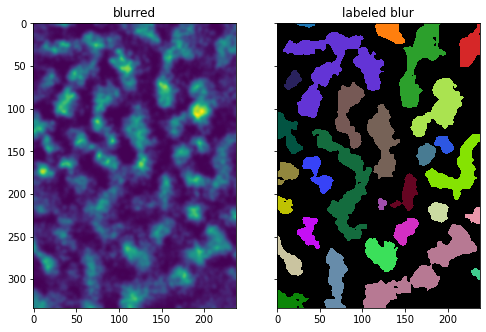

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


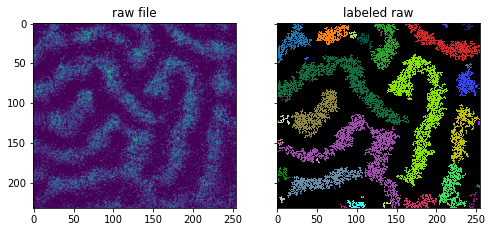

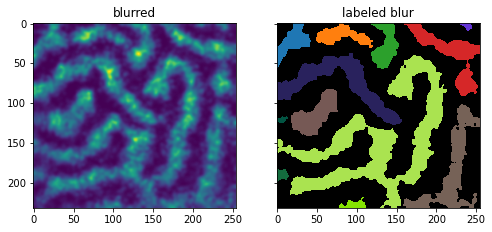

[array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  5,  5],
       ...,
       [ 0, 83, 83, ...,  0,  0,  0],
       [83, 83, 83, ...,  0,  0,  0],
       [83, 83, 83, ...,  0,  0,  0]], dtype=int32), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  4,  4,  4],
       [ 0,  0,  0, ...,  4,  4,  4],
       ...,
       [29, 29, 29, ...,  0,  0,  0],
       [29, 29, 29, ...,  0,  0,  0],
       [29, 29, 29, ...,  0,  0,  0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


In [5]:
import glob,os
import skimage.io as skio
from skimage.measure import label
import scipy
import skimage
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/domchom/Desktop/opticalFlow-testing/watershed/single_frame") # the pathname that contains the folders of interest

fileNames = [] #list for each of the file names
for file in glob.glob("*.tif"): #obtaining the name of each file that ends in ".tif" in the provided directory
    fileNames.append(file)
    fileNames.sort()

list_of_labeled_images = []
for file in fileNames: #iterate over each file in the list of file names
    image = skio.imread(file) #read each movie

    ##### Below is used for selecting the edge of the cell (not perfect) by selecting the highest pixel values after 50 frames
    mask_raw = image > np.mean(image) #masked the image over the mean pixel value
    raw_remove_small = skimage.morphology.remove_small_objects(mask_raw, min_size=10) #filtering out the smaller regions, like membrane folds
    labeled_raw = label(raw_remove_small, connectivity=2) #for labelling the structures
    list_of_labeled_images.append(labeled_raw)

    blurred = scipy.ndimage.gaussian_filter(image, 2)
    mask_blur = blurred > np.mean(blurred) #masked the image over the mean pixel value
    blur_remove_small = skimage.morphology.remove_small_objects(mask_blur, min_size=50) #filtering out the smaller regions, like membrane folds
    labeled_blur = label(blur_remove_small, connectivity=2) #for labelling the structures
    list_of_labeled_images.append(labeled_blur)

    fig, axes = plt.subplots(ncols=2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title(f'raw file')
    ax[1].imshow(labeled_raw)
    ax[1].set_title('labeled raw')

    cle.imshow(labeled_raw, labels=True)

    fig, axes = plt.subplots(ncols=2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(blurred)
    ax[0].set_title('blurred')
    ax[1].imshow(labeled_blur)
    ax[1].set_title('labeled blur')

    cle.imshow(labeled_blur, labels=True)

print(list_of_labeled_images)